In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

# A Penning Trap Simulation: add more particles!

Here we adapt our previous simulation to consider a particle in a penning trap. This involes introducing a penning trap electric field which has the form:

\begin{align}
     \vec{E} &= A \cdot \begin{bmatrix}
           2x \\
           2y \\
           -4z
         \end{bmatrix}
\end{align}

this time we will add more particles. This has means that every particle experiences an additional electric field due to the presence of other particles. This is given by:

\begin{equation}
    \vec{E}_{0} = \frac{1}{4\pi\epsilon}\sum^n_i \frac{q_i \vec{r_0} - \vec{r_i}}{|\vec{r_0} - \vec{r_i}|^3}
\end{equation}

where $E_0$ is the additional coulomb field on a particle at $r_0$ due to the collection of other particles in positions $r_i$

In [43]:
class ChargedParticle:
    def __init__(self, mass, charge, postion, velocity):
        self.m = mass
        self.q = charge
        self.r = np.array(postion)
        self.v = np.array(velocity)
        
    def Penning_E_field(self):
        return(np.array([2*self.r[0], 2*self.r[1], -4*self.r[2]]))
    
    def other_particle_E_field(self, other_particles):
        coulomb=0
        for i in other_particles:
            coulomb += (i.q)*np.array((self.r-i.r)/np.linalg.norm(self.r-i.r)**3)
        return(np.array(coulomb))
        
    def v_r_step(self, dt, E, B):
        # Boris Algorithm
        v_minus = (dt*self.q*E)/(2*self.m) + self.v
        c = (dt*self.q)/(2*self.m)
        
        #solve for v_plus through system of linear equations
        a = np.array([[1, -c*B[2], c*B[1]],[c*B[2], 1, -c*B[0]], [-c*B[1], c*B[0], 1]])
        b = c * np.cross(v_minus, B) + v_minus
        v_plus =np.linalg.solve(a, b)
        
        v_new = v_plus + (dt*self.q*E)/(2*self.m)
        # END OF METHOD SIMILAR TO YOURS
        
        # below is a second version of the Boris Alg i worked out using matrix idenities?
        # does it work? Kind of.       
#         v_new=[]
#         Omega = (self.q*B)/self.m
#         Sigma = (self.q*E)/self.m
#         A = np.array((Omega*dt)/2)
#         C = np.array(self.v + dt*(Sigma + np.cross(self.v, Omega/2)))
#         v_new=(C + A*np.dot(A, C) - np.cross(A, C))/(1+np.dot(A, A))

        #Step and replace position and velocity
        r_new = self.r + v_new*dt
        self.v = np.array(v_new)
        self.r = np.array(r_new)

In [103]:
## Initialise particle properties
particles=[]
num_particles=4
q = 1
m = 1

#Initialise B field
B=np.array([0, 0, 5])

#create particles
for i in range(0, num_particles):
    particles.append(ChargedParticle(m, q, [0.5*i-0.25, 0, 1], [0,0, 0]))

In [104]:
#iterate through steps0
T=0
V=[]
R=[]
dt=.005
time=[]


while T<100:
    time.append(T)
    r=[]
    v=[]
    for p in range(0, len(particles)):
        other_particles=np.delete(particles, p)
        E = particles[p].Penning_E_field() + particles[p].other_particle_E_field(other_particles)
        particles[p].v_r_step(dt, E, B)
        
        r.append(particles[p].r)
        v.append(particles[p].v)
    
    R.append(r)
    V.append(v)
    T=T+dt


In [105]:
R=np.transpose(np.array(R))
V=np.transpose(np.array(V))
#for i in range(0, num_particles):
    #print(R[0][i])

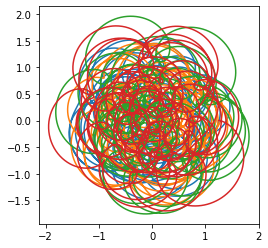

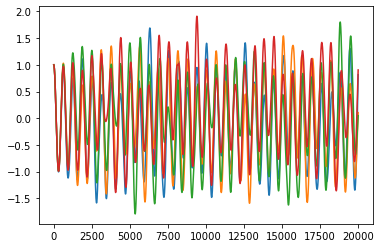

In [106]:
for i in range(0, num_particles):
    plt.plot(R[0][i], R[1][i]) 
plt.gca().set_aspect('equal')
plt.show()

for i in range(0, num_particles):
    plt.plot(R[2][i]) 

This looks as though it could be correct? Its fairly difficult to determine as it is a chaotic multi body process.